## Imports

In [1]:
import math
import matplotlib.pyplot as plt

## Analyzing and Ploting the effect of Free Falling Body using Euler Method

### ----------------------------------------------------------------------------------------------------------------------------------
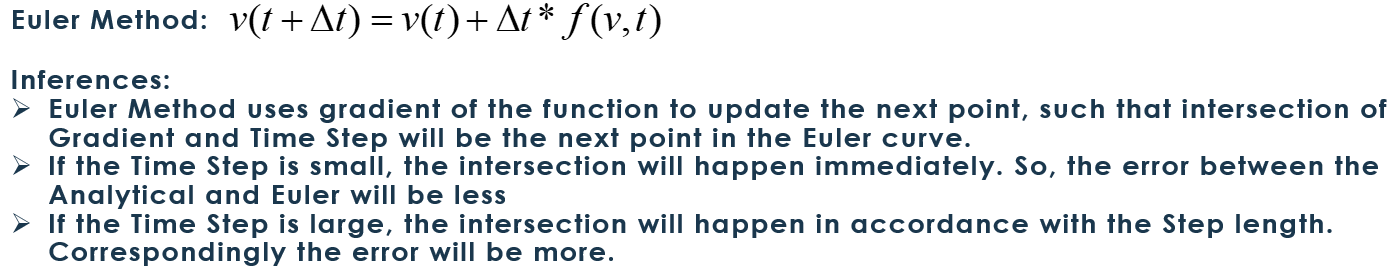
### ----------------------------------------------------------------------------------------------------------------------------------
#### The free fall of a particle in the presence of air friction is governed by the differential equation  

#### where m represents the mass of the particle, 
#### g represents the acceleration due to gravity, 
#### cd represents the coefficient of drag and 
#### x represents the instantaneous position of the particle.  
#### Considered inputs like, m = 3.4 * 10-5 kg, g = 9.81 m/s2,  = 0.5 kg/m and initial condition as x(0) = 0 and dx/dt = 0 (Initial position is considered as the reference position)
### ----------------------------------------------------------------------------------------------------------------------------------
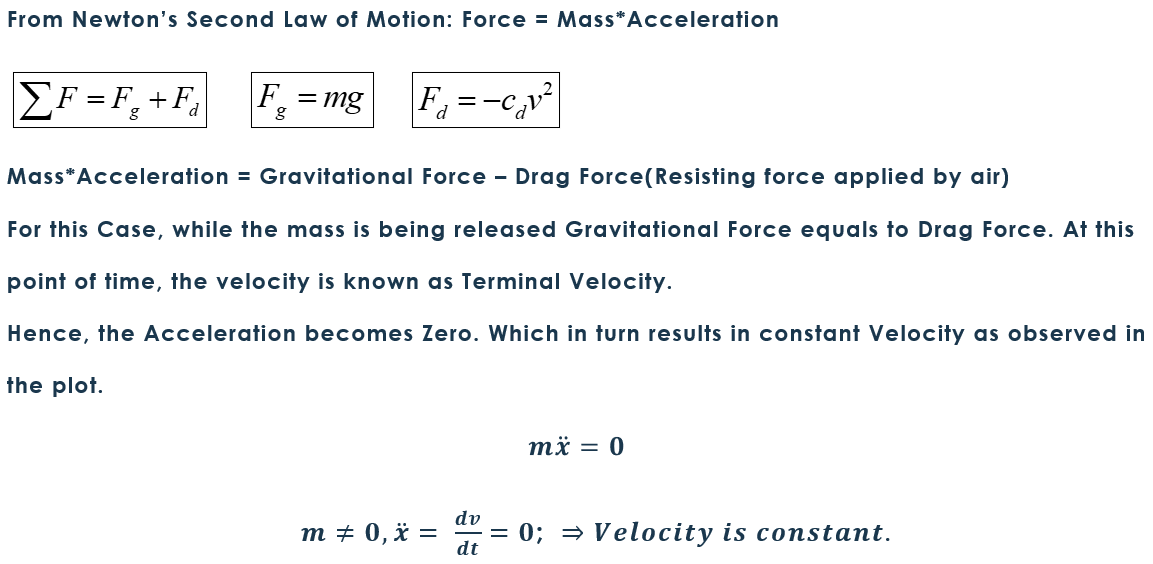
### ----------------------------------------------------------------------------------------------------------------------------------

In [234]:
class Free_fall():                                                 # Parent Class 
    def __init__(self,t_initial,t_final,h,m,g,c_d):                # Parameterized Constructor
        self.t_initial = t_initial                                 # Initial time
        self.t_final = t_final                                     # final time
        self.h = h                                                 # time step for observing the motion
        self.m = m                                                 # mass of the object
        self.g = g                                                 # gravitationL
        self.c_d = c_d
#------------------------------------------------------------------------------------------------------------------------------#
class Free_fall_Analytical(Free_fall):                             # Child Class1
    def plotting(self,t,Distance,Velocity):                        # Parameterized Constructor
        n = int((self.t_final-self.t_initial)/self.h)              # number of points in the range  
        v_t = math.sqrt((self.m*self.g)/self.c_d)                  # Terminal Velocity
    
        print("t \t\t Distance \t Velocity")        
       
        t_points = []                                              # Initializing time step list
        Distance_all = []                                          # Initializing distance list
        Velocity_all = []                                          # Initializing velocity list

        for i in range(n+1):
            Velocity_points = Velocity(t,v_t)                      # Velocity Update
            Distance_points = Distance(t,Velocity_points)          # Distance Update
            t_points.append(t); Distance_all.append(Distance_points); Velocity_all.append(Velocity_points)
            print("%f \t %f \t %f"% (t,Distance_points,Velocity_points))# printing the t values, Distance and Velocity solution
            t += self.h                                            # Time Update   
        
        plt.figure(figsize=(10,5))
        plt.plot(t_points,Distance_all,'go-')
        plt.plot(t_points,Velocity_all,'bo-')
        #plt.text(0.9,0.005,f"Step Size: {self.h}")
        plt.title(f"Free Fall - Analytical Method @ Step Size: {self.h}")
        plt.legend(["Distance","Velocity"])
#------------------------------------------------------------------------------------------------------------------------------#
class Free_fall_Euler(Free_fall):                                  # Child Class2
    def plotting(self,t):   
        n = int((self.t_final-self.t_initial)/self.h)              # number of points in the range  
    
        print("t \t\t Distance \t Velocity")        
    
        t_points = []                                              # Initializing time step list
        Distance_all = []                                          # Initializing distance list
        Velocity_all = []                                          # Initializing velocity list
        v_old = 0                                                  # Initial velocity is zero
        d = 0                                                      # Initial distance is zero
        for i in range(n+1):
            t_points.append(t); Distance_all.append(d); Velocity_all.append(v_old)
            #print("%f \t %f \t %f"% (t,d,v_old))                   # printing the t values, Distance and Velocity solution
            v_new = v_old + (9.81-(0.5/3.4)*10**5*v_old**2)*0.001   # Velocity Update
            d += v_old*self.h                                       # Distance Update
            v_old = v_new
            t += self.h                                             # Time Update   
        
        plt.figure(figsize=(10,5))
        plt.plot(t_points,Distance_all,'go-')
        plt.plot(t_points,Velocity_all,'bo-')
        #plt.text(0.88,0.005,f"Step Size: {self.h}")
        plt.title(f"Free Fall - Euler Method @ Step Size: {self.h}")
        plt.legend(["Distance","Velocity"])

## Model for Free fall

In [235]:
m = 3.4/100000                                             # Assumed Mass
g = 9.81                                                   # Assumed Acceleration due to gravity
c_d = 0.5                                                  # coefficient of drag
analytical = Free_fall_Analytical(0,1,0.01,m,g,c_d)        # Object creation - Model for Analytical approach
euler = Free_fall_Euler(0,1,0.01,m,g,c_d)                  # Object creation - Model for Euler approach

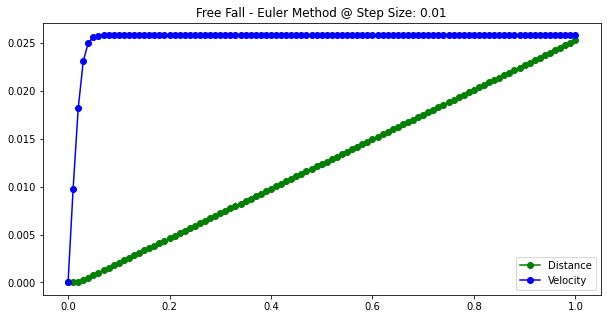

In [236]:
euler.plotting(0)                                                   # Accessing Euler Object

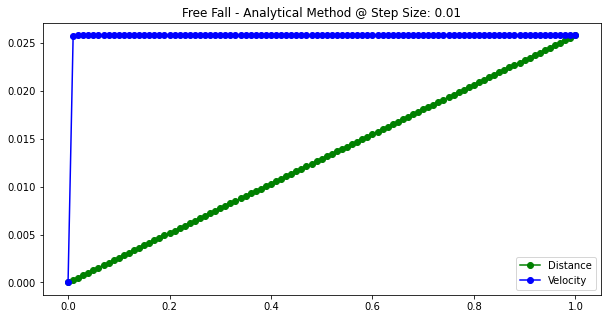

In [237]:
Distance = lambda t,v: v*t                                          # Distance relation         
Velocity = lambda t,v_t: v_t*math.tanh((9.81*t)/v_t)                # Velocity Relation
analytical.plotting(0,Distance,Velocity)                            # Accessing Analytical Object